In [32]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tqdm


ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded


In [2]:
date = "JUN15"

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

In [39]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/FITS_marti')

from prepareFits import *

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


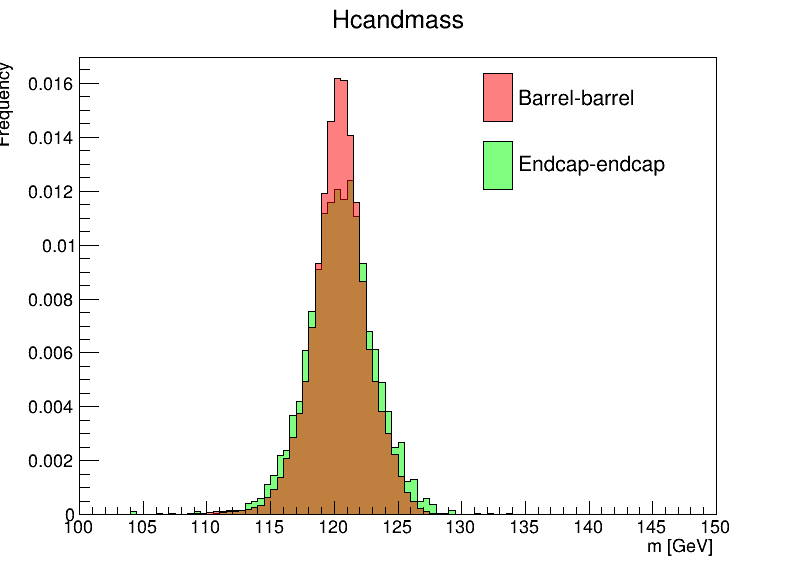

In [42]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)

tag = "GFcat"
year = 2018
date = "JUN14"
mesonCat = "D0StarCat"
extraTitle = "barrel meson, barrel photon"

hb = getHistoFromFile(getFullNameOfHistFile(mesonCat, tag, year, date, extraTitle=extraTitle))

extraTitle = "endcap meson, endcap photon"

he = getHistoFromFile(getFullNameOfHistFile(mesonCat, tag, year, date, extraTitle=extraTitle))

hb.GetXaxis().SetRangeUser(100, 150)
he.GetXaxis().SetRangeUser(100, 150)

hb.SetFillColorAlpha(ROOT.kRed, 0.5)
hb.SetLineColor(ROOT.kBlack)
he.SetFillColorAlpha(ROOT.kGreen, 0.5)
he.SetLineColor(ROOT.kBlack)

hb.Scale(1/hb.GetEntries())
he.Scale(1/he.GetEntries())

stack = ROOT.THStack("stack", "Hcandmass")
stack.Add(he)
stack.Add(hb)

stack.Draw("hist nostack")
stack.GetXaxis().SetTitle("m [GeV]")
stack.GetYaxis().SetTitle("Frequency")
stack.GetXaxis().SetRangeUser(100, 150)

legend = ROOT.TLegend(0.60, 0.65, 0.8999, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(hb, "Barrel-barrel", "f")
legend.AddEntry(he, "Endcap-endcap", "f")
legend.Draw()

canvas.Draw()